In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [135]:
print("{} rows and {} features in train set".format(df_train.shape[0], df_train.shape[1]))
print("{} rows and {} features in test set".format(df_test.shape[0], df_test.shape[1]))

27100 rows and 18 features in train set
18050 rows and 17 features in test set


<Axes: >

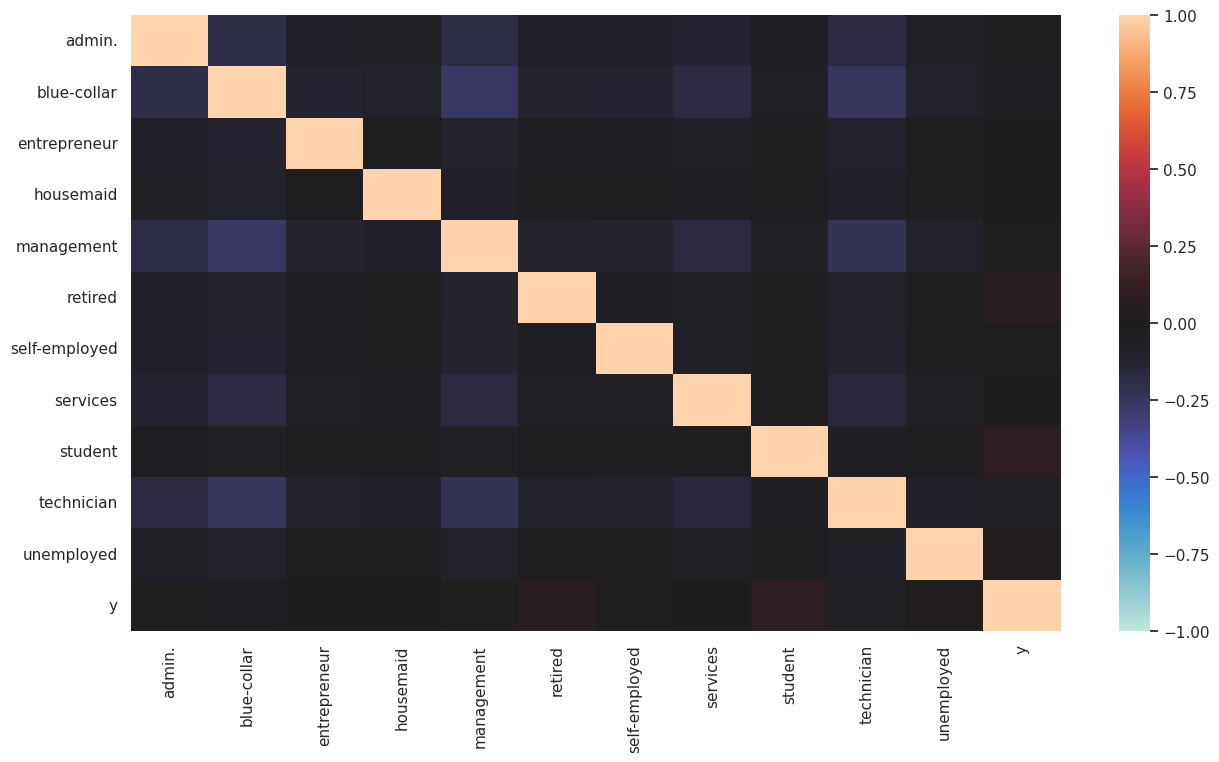

In [136]:
# job と yes/no の相関

df_job_y = df_train[['job', 'y']].copy(deep=True)

df_job_y_EDA = pd.get_dummies(df_job_y['job'])
df_job_y_EDA = df_job_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_job_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

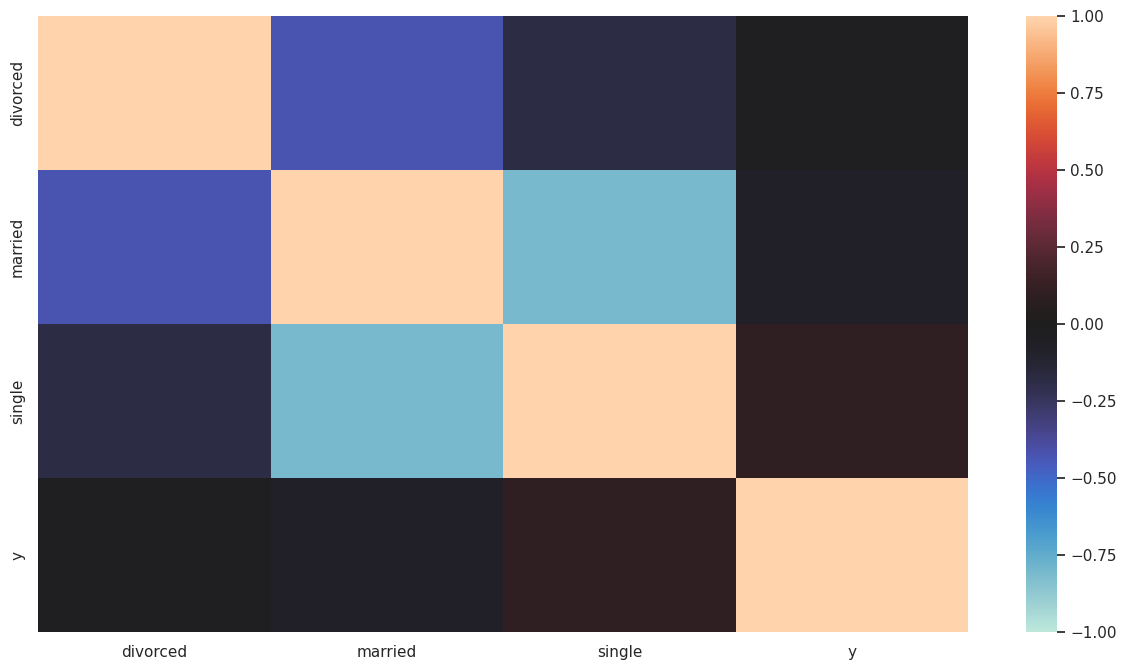

In [137]:
# marital と yes/no の相関

df_marital_y = df_train[['marital', 'y']].copy(deep=True)

df_marital_y_EDA = pd.get_dummies(df_marital_y['marital'])
df_marital_y_EDA = df_marital_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_marital_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

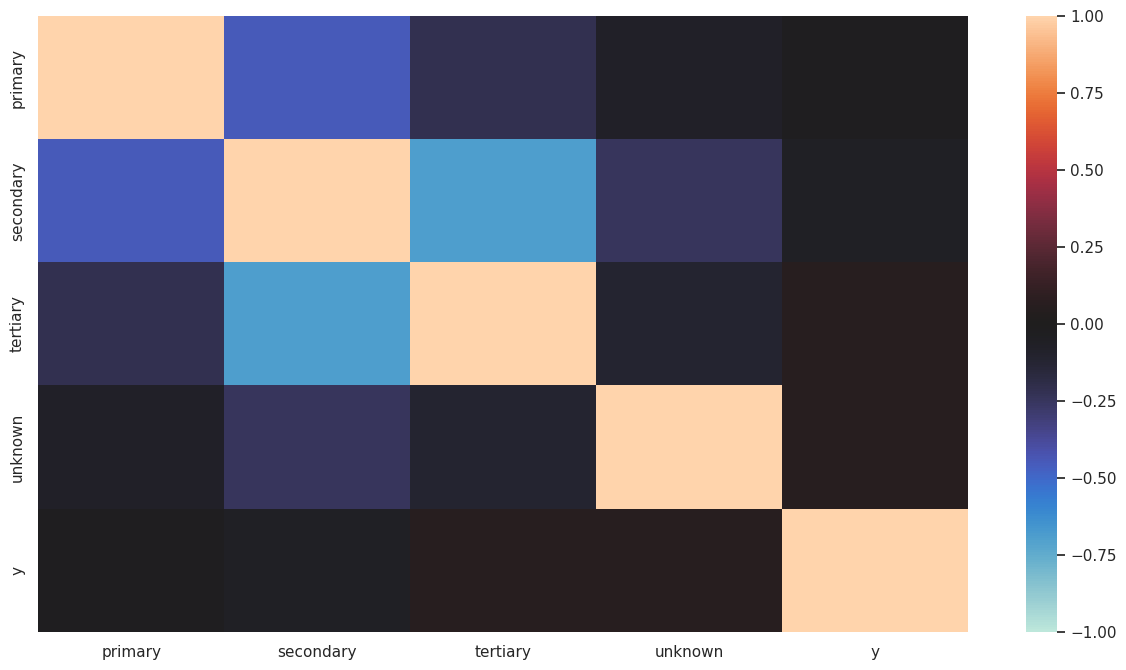

In [138]:
# education と yes/no の相関

df_education_y = df_train[['education', 'y']].copy(deep=True)

df_education_y_EDA = pd.get_dummies(df_education_y['education'])
df_education_y_EDA = df_education_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_education_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

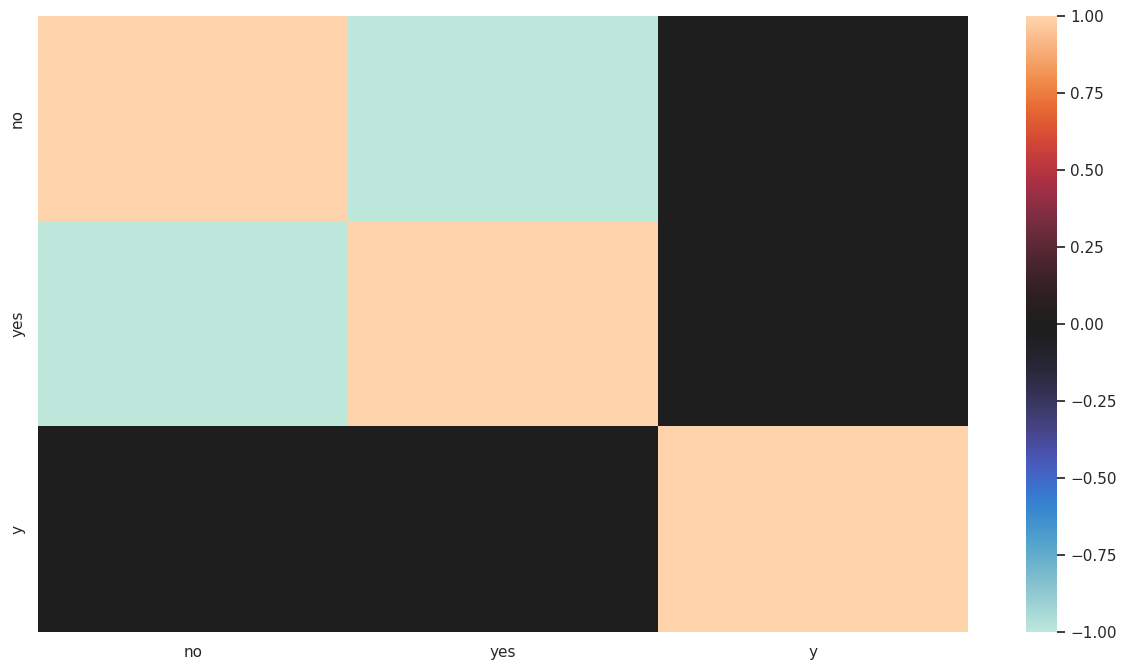

In [139]:
# default と yes/no の相関

df_default_y = df_train[['default', 'y']].copy(deep=True)

df_default_y_EDA = pd.get_dummies(df_default_y['default'])
df_default_y_EDA = df_default_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_default_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

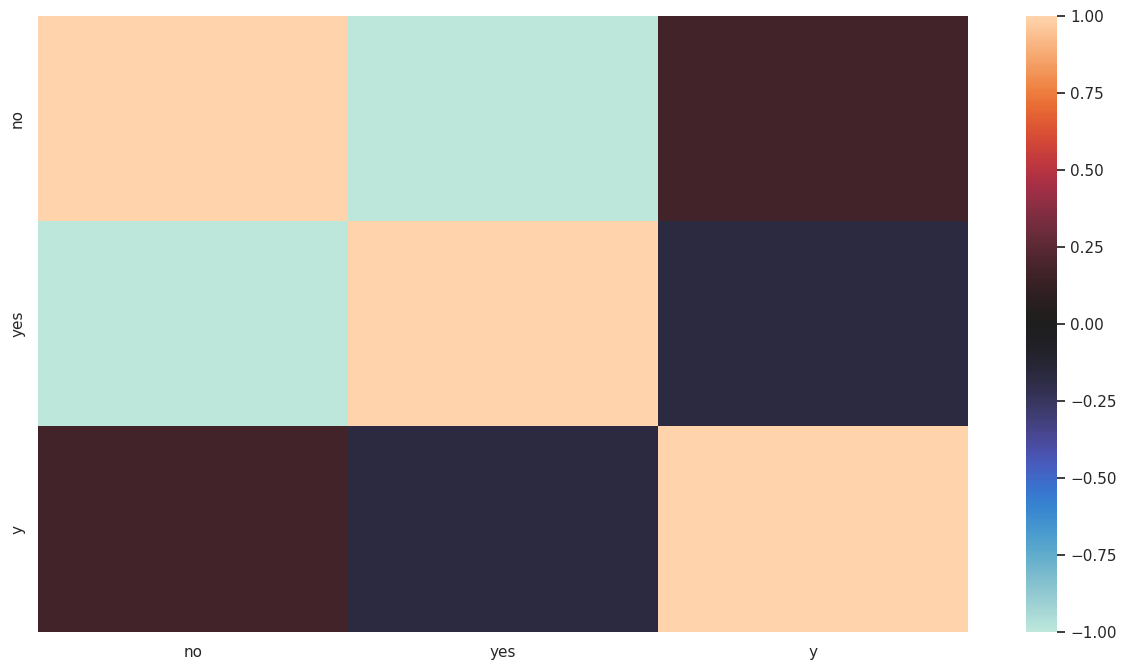

In [140]:
# housing と yes/no の相関

df_housing_y = df_train[['housing', 'y']].copy(deep=True)

df_housing_y_EDA = pd.get_dummies(df_housing_y['housing'])
df_housing_y_EDA = df_housing_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_housing_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

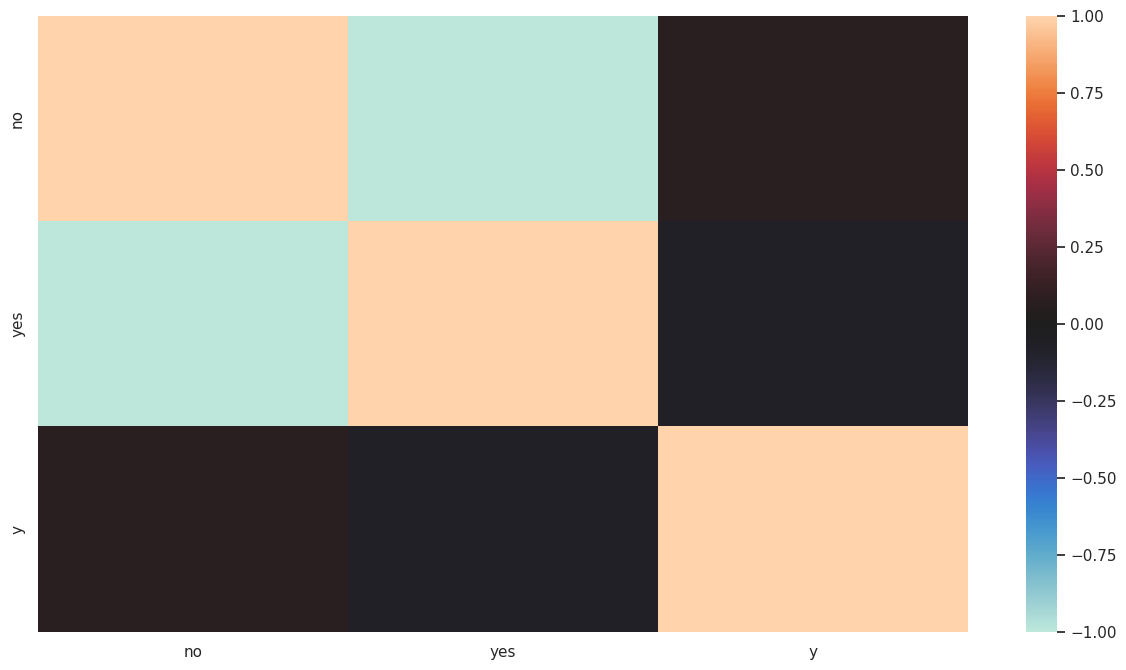

In [141]:
# loan と yes/no の相関

df_loan_y = df_train[['loan', 'y']].copy(deep=True)

df_loan_y_EDA = pd.get_dummies(df_loan_y['loan'])
df_loan_y_EDA = df_loan_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_loan_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

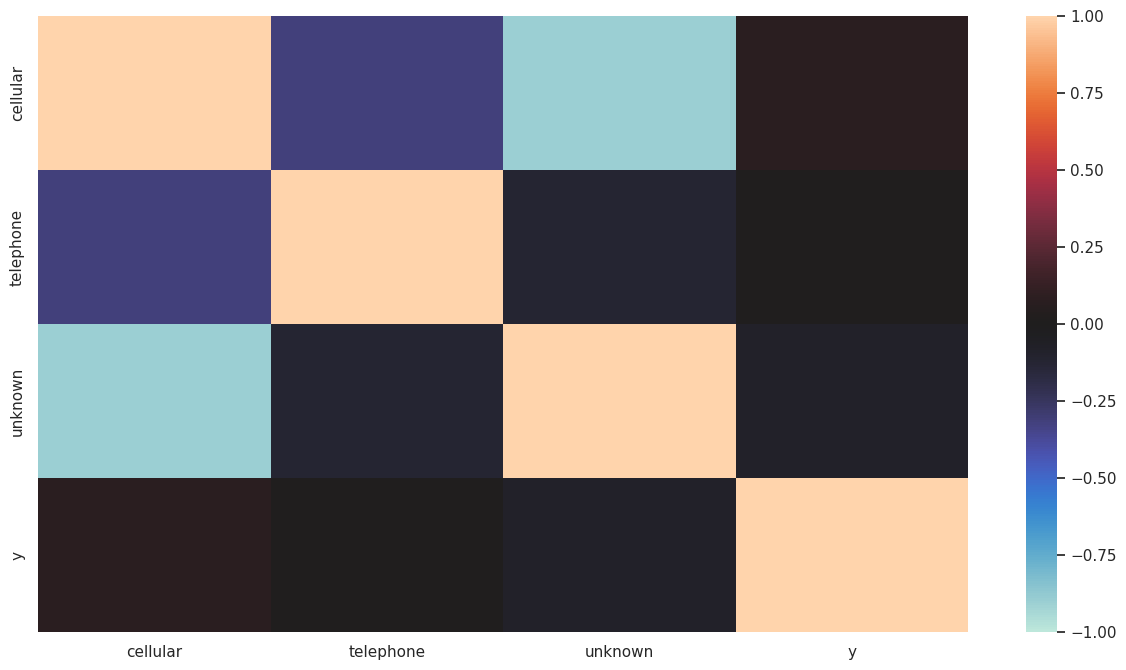

In [142]:
# contact と yes/no の相関

df_contact_y = df_train[['contact', 'y']].copy(deep=True)

df_contact_y_EDA = pd.get_dummies(df_contact_y['contact'])
df_contact_y_EDA = df_contact_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_contact_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

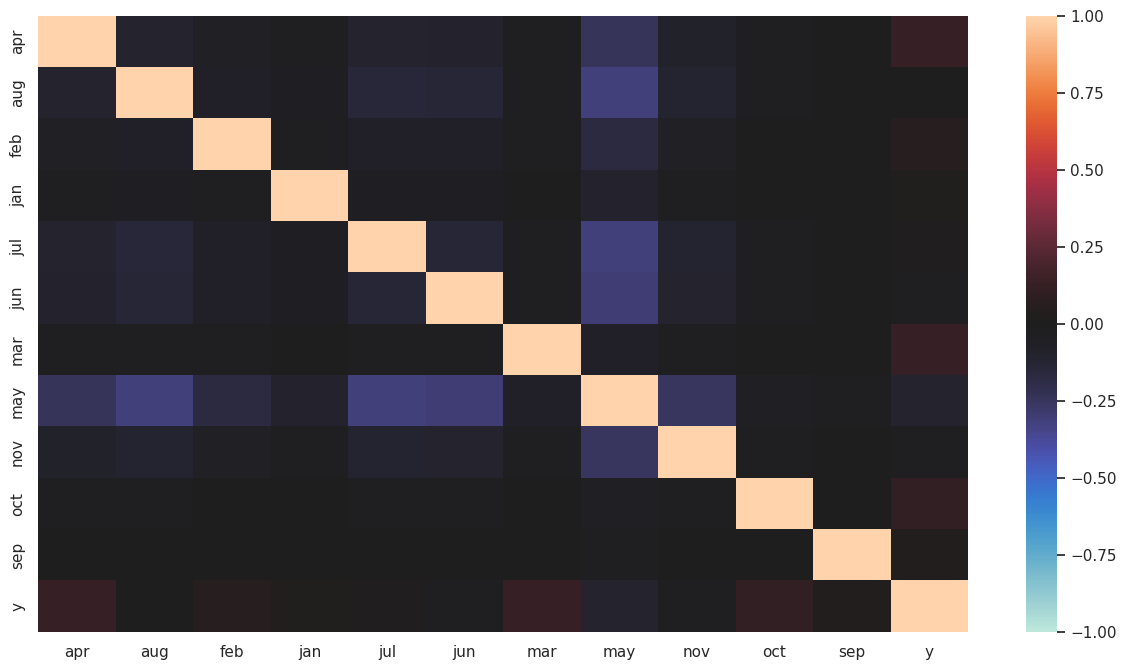

In [143]:
# month と yes/no の相関

df_month_y = df_train[['month', 'y']].copy(deep=True)

df_month_y_EDA = pd.get_dummies(df_month_y['month'])
df_month_y_EDA = df_month_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_month_y_EDA.corr(), vmax=1, vmin=-1, center=0)

<Axes: >

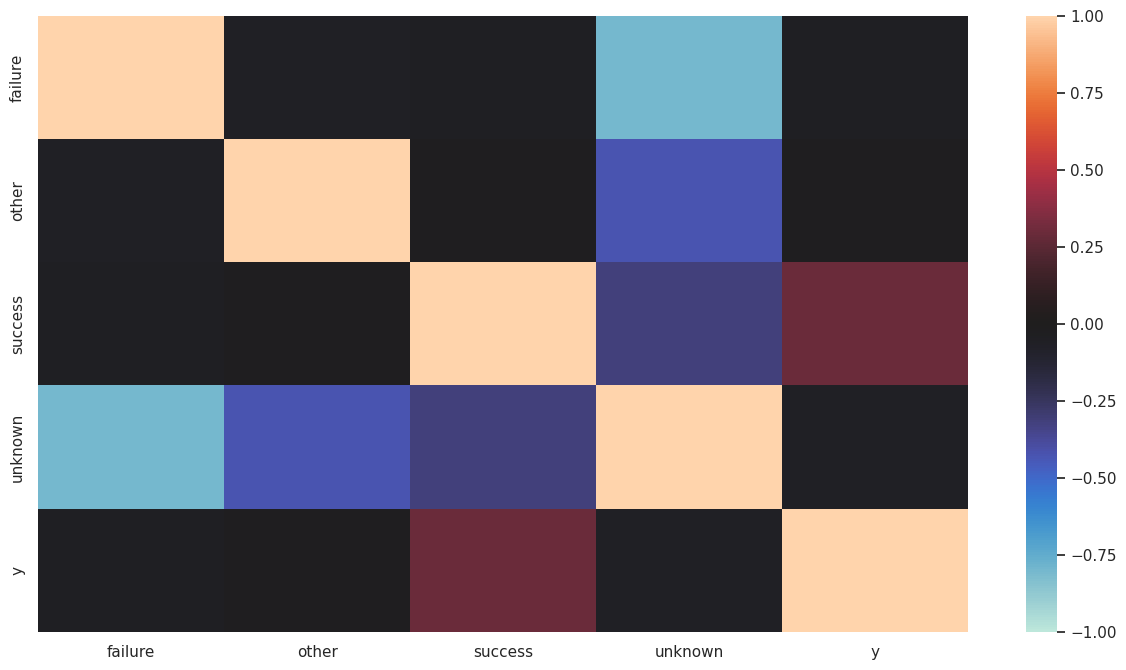

In [144]:
# poutcome と yes/no の相関

df_poutcome_y = df_train[['poutcome', 'y']].copy(deep=True)

df_poutcome_y_EDA = pd.get_dummies(df_poutcome_y['poutcome'])
df_poutcome_y_EDA = df_poutcome_y_EDA.join(df_train['y'].replace(['no', 'yes'], [0, 1]))

sns.heatmap(df_poutcome_y_EDA.corr(), vmax=1, vmin=-1, center=0)

In [145]:
data = pd.concat([df_train, df_test], sort=False)

# no yes を 0 と 1 に変更
data['default'].replace(['no', 'yes'], [0, 1], inplace=True)
data['housing'].replace(['no', 'yes'], [0, 1], inplace=True)
data['loan'].replace(['no', 'yes'], [0, 1], inplace=True)

# クラス分類したいんだけど、まだ扱う術を知らないのでとりあえずバイバイ

data['marital'] = data['marital'].map({'married':0, 'single':1, 'divorced':2}).astype(int)
data['contact'] = data['contact'].map({'cellular':1,  'unknown':0, 'telephone':2}).astype(int)
data['month'] = data['month'].map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}).astype(int)
data['education'] = data['education'].map({'primary':1, 'secondary':2, 'tertiary':3, 'unknown':0})

# jobは多すぎるのでsklearnに頼る（知ってたら他も使うんだけどな）
from sklearn.preprocessing import LabelEncoder
job_le = LabelEncoder()
data['job'] = job_le.fit_transform(data['job'])

# pdaysは-1とそれ以外で分ける
data.loc[data['pdays']>=0, 'pdays'] = 1 
data.loc[~data['pdays']>=0, 'pdays'] = 0

# previousは0とそれ以外で分ける
data.loc[data['previous']!=0, 'previous'] = 1

# 使わない奴を落とす

delete_columns = ['balance', 'contact', 'month', 'age', 'day', 'campaign', 'poutcome', 'duration']

data.drop(delete_columns, axis=1, inplace=True)


In [146]:
from sklearn.model_selection import train_test_split

In [147]:
train = data[:len(df_train)]
test = data[len(df_train):]

y_train = train['y'].astype(int)
X_train = train.drop('y', axis=1)
X_test = test.drop('y', axis=1)

print(X_train.head())

   id  job  marital  education  default  housing  loan  pdays  previous
0   0    7        0          2        0        1     0      1         0
1   1    2        1          3        0        0     0      1         0
2   2    4        0          3        0        1     0      1         0
3   3    9        0          2        0        1     1      1         0
4   4   10        0          1        0        1     0      1         0


In [148]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [149]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'pdays', 'previous']

In [150]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import lightgbm as lgb
import numpy as np

In [151]:
FOLD = 5
NUM_ROUND = 1000

params = {
    'objective': 'binary'
}

valid_scores = []
models = []

kf = KFold(n_splits=FOLD, shuffle=True, random_state=0)

for fold, (train_indices, valid_indices) in enumerate(kf.split(X_train)):
    X_t, X_v = X_train.iloc[train_indices], X_train.iloc[valid_indices]
    y_t, y_v = y_train.iloc[train_indices], y_train.iloc[valid_indices]

    lgb_train = lgb.Dataset(X_t, y_t, categorical_feature=categorical_features)
    lgb_eval = lgb.Dataset(X_v, y_v, categorical_feature=categorical_features)
    
    model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=True), lgb.log_evaluation(0)])

    y_valid_pred = model.predict(X_v, num_iteration=model.best_iteration)

    score = roc_auc_score(y_v, y_valid_pred)

    print(f'fold {fold}, AUC: {score}')
    valid_scores.append(score)
    models.append(model)

cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')



[LightGBM] [Info] Number of positive: 1178, number of negative: 13998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 15176, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077623 -> initscore=-2.475096
[LightGBM] [Info] Start training from score -2.475096
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[33]	training's binary_logloss: 0.22464	valid_1's binary_logloss: 0.240846
fold 0, AUC: 0.7664596451058958
[LightGBM] [Info] Number of positive: 1178, number of negative: 13998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if mem

In [152]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categorical_features)

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=10, verbose=True), lgb.log_evaluation(0)])

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

[LightGBM] [Info] Number of positive: 1478, number of negative: 17492
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 18970, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.077912 -> initscore=-2.471054
[LightGBM] [Info] Start training from score -2.471054
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[24]	training's binary_logloss: 0.23089	valid_1's binary_logloss: 0.247391


In [153]:
sub = list(map(float, y_pred))
for idx, x in enumerate(sub):
    
    sub[idx] = [idx, x]

import csv

with open('submission.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(sub)